In [74]:
print('NOMER 1 B VALIDASI')
print('Lakukan validasi terhadap hasil perhitungan numerik untuk kasus yang eepertama (tanpa hambatan udara).')

NOMER 1 B VALIDASI
Lakukan validasi terhadap hasil perhitungan numerik untuk kasus yang eepertama (tanpa hambatan udara).


In [75]:
#import Library
import matplotlib.pyplot as plt 
import numpy as np 

In [76]:
# Perhitungan numerical  (Global Func)
def position_numerical_vx(v,ax,dt):
    speed = v + ax * dt
    return speed 
def position_numerical_vy(v,ay,dt):
    speed = v + ay * dt
    return speed
def position_numerical_y(y,v,dt):
    high = y + v * dt
    return high
def position_numerical_x(x,v,dt):
    position = x + v * dt
    return position

In [77]:
# Perhitungan Analytical  (Global Func)
def position_analytical_vx(v,ax,t):
    speed = v + ax * t
    return speed 
def position_analytical_vy(v,ay,t):
    speed = v + ay * t
    return speed
def position_analytical_y(y,v,t,ay):
    high = v*t + 0.5 * ay * pow(t,2)
    return high
def position_analytical_x(x,v,t,ax):
    position = v*t - 0.5 * ax * pow(t,2)
    return position

In [78]:
# Func kecepatan awal pada sumbu x,y
def kec_awal_vx(v0,s_tembak):
    return v0 * np.cos(s_tembak)
def kec_awal_vy(v0,s_tembak):
    return v0 * np.sin(s_tembak)

In [79]:
# Inputan 
m = 0.15
v0 = 50 
s_tembak = 35*(2*np.pi/360)
D = 0.0013
dt = 0.01

In [80]:
#Numerical

#inisiasi percepatan pada sumbu x,y (Numerical)
ax_th = 0
ay_th = -9.8

#inisiasi posisi sumbu x,y,waktu
x_th = 0 #posisi sumbu x (jarak awal - akhir lemparan)
y_th = 0 #posisi sumbu y (ketinggian)
t_th = 0 #waktu
position_th = [x_th] #array posisi
high_th = [y_th] #array ketinggian
time_th = [t_th] #array waktu

# inisiasi kecepatan awal pada sumbu x dan y
vx = kec_awal_vx(v0,s_tembak)
vy = kec_awal_vy(v0,s_tembak)

#inisiasi untuk menentukan titik tertinggi max
y_th_max = 0

#perulangan untuk menentukan posisi sumbu x,y setiap waktu
while y_th >= 0:
    vx = position_numerical_vx(vx,ax_th,dt)
    vy = position_numerical_vy(vy,ay_th,dt)
    y_th = position_numerical_y(y_th,vy,dt)
    x_th = position_numerical_x(x_th,vx,dt)
    t_th = t_th + dt

    if y_th < 0:
        break
    if y_th > y_th_max:
        y_th_max = y_th
    position_th.append(x_th)
    high_th.append(y_th)
    time_th.append(t_th)


====Tanpa Hambatan Numerical=====
High =  41.81971970725295 meter
Position =  239.6019729545268 meter
total time :  5.8599999999999195 second


====Tanpa Hambatan Analytical=====
High =  41.96293792542825
Position =  239.6019729545268
total time :  5.8599999999999195


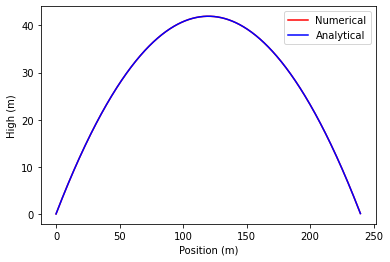

In [81]:
#Analytical

#inisiasi percepatan pada sumbu x,y (Numerical)
ax_th = 0
ay_th = -9.8

#inisiasi posisi sumbu x,y,waktu
x_th = 0 #posisi sumbu x (jarak awal - akhir lemparan)
y_th = 0 #posisi sumbu y (ketinggian)
t_th = 0 #waktu
position_th = [x_th] #array posisi
high_th = [y_th] #array ketinggian
time_th = [t_th] #array waktu

# inisiasi kecepatan awal pada sumbu x dan y
vx = kec_awal_vx(v0,s_tembak)
vy = kec_awal_vy(v0,s_tembak)

#inisiasi untuk menentukan titik tertinggi max
y_max_num_th = 0

#perulangan untuk menentukan posisi sumbu x,y setiap waktu
while y_th >= 0:
    y_th = position_analytical_y(y_th,vy,t_th,ay_th)
    x_th = position_analytical_x(x_th,vx,t_th,ax_th)
    t_th = t_th + dt

    if y_th < 0:
        break
    if y_th  > y_max_num_th: 
        y_max_num_th = y_th
    position_th.append(x_th)
    high_th.append(y_th)
    time_th.append(t_th)
    

#total_time_th = -((2*vy)/ay_th)
#position_far_th = (vx * total_time_th)
#high_max_th = -(pow(v0,2) * pow(np.sin(s_tembak),2)) / (2 * ay_th)

#Visualisasi Numerical
print ('====Tanpa Hambatan Numerical=====')
print ('High = ',y_th_max,'meter')
print ('Position = ',position_th[-1],'meter')
print("total time : ",time_th[-1],'second')
plt.plot(position_th,high_th,c='r', label ='Numerical without Air Resistance')
plt.xlabel('Position (m)')
plt.ylabel('High (m)')

#Visualisasi Analytical
print('\n')
print ('====Tanpa Hambatan Analytical=====')
print ('High = ',y_max_num_th)
print ('Position = ',position_th[-1])
print("total time : ",time_th[-1])
plt.plot(position_th,high_th,c='b', label ='Analytical without Air Resistance')
plt.xlabel('Position (m)')
plt.ylabel('High (m)')
plt.legend(['Numerical','Analytical'],loc='best') 
plt.show()
